<a href="https://colab.research.google.com/github/siddarth99/Intel_multiclass_image_classification/blob/master/intel_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files


In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"siddarthsuvarna","key":"612a90c0f40e63fe2fdd0068e59461ab"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [8]:
!kaggle datasets download 'puneet6060/intel-image-classification'

 97% 337M/346M [00:02<00:00, 131MB/s]
100% 346M/346M [00:02<00:00, 149MB/s]


In [ ]:
!unzip intel-image-classification.zip -d sample_data

In [10]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import os
import numpy as np 
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
import matplotlib.gridspec as gridspec
from random import randint
from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [11]:
def get_images(directory):
    images = []
    labels = []
    
    for dir in os.listdir(directory):
        label = -1
        if(dir == "buildings"):
            label = 0
        if(dir == "forest"):
            label = 1
        if(dir == "glacier"):
            label = 2
        if(dir == "mountain"):
            label = 3
        if(dir == "sea"):
            label = 4
        if(dir == "street"):
            label = 5
        for image_dir in os.listdir(directory +"//"+ dir):
            image = cv2.imread(directory +"//"+ dir + "//"+ image_dir)
            image = cv2.resize(image, (150,150))
            images.append(image)
            labels.append(label)
    return shuffle(images, labels)

In [12]:
images, labels = get_images("/content/sample_data/seg_train/seg_train")
images = np.array(images)
labels = np.array(labels)

In [13]:
print(images.shape)

(14034, 150, 150, 3)


In [14]:
print(labels[0])
labels = to_categorical(labels)
print(labels[0])

2
[0. 0. 1. 0. 0. 0.]


In [15]:
images = images.astype('float32')
images /= 255.0

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size=(7,7), strides=(2,2), activation='relu', input_shape=(150,150,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=156, kernel_size=(2,2), strides=(1,1), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(72, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

In [54]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 72, 72, 64)        9472      
_________________________________________________________________
batch_normalization_29 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 35, 35, 96)        55392     
_________________________________________________________________
batch_normalization_30 (Batc (None, 35, 35, 96)        384       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 17, 17, 128)      

In [55]:
trained = model.fit(images, labels, epochs =64 ,validation_split = 0.1, batch_size=32)

Epoch 1/64
395/395 [==============================] - 7s 19ms/step - loss: 1.4925 - accuracy: 0.4360 - val_loss: 1.8382 - val_accuracy: 0.3554
Epoch 2/64
395/395 [==============================] - 7s 18ms/step - loss: 1.1394 - accuracy: 0.5739 - val_loss: 1.0100 - val_accuracy: 0.6574
Epoch 3/64
395/395 [==============================] - 7s 18ms/step - loss: 0.9707 - accuracy: 0.6479 - val_loss: 1.2158 - val_accuracy: 0.5719
Epoch 4/64
395/395 [==============================] - 7s 18ms/step - loss: 0.8619 - accuracy: 0.7011 - val_loss: 2.0582 - val_accuracy: 0.3604
Epoch 5/64
395/395 [==============================] - 7s 18ms/step - loss: 0.7842 - accuracy: 0.7362 - val_loss: 1.1497 - val_accuracy: 0.6496
Epoch 6/64
395/395 [==============================] - 7s 18ms/step - loss: 0.7151 - accuracy: 0.7617 - val_loss: 2.7308 - val_accuracy: 0.3953
Epoch 7/64
395/395 [==============================] - 7s 18ms/step - loss: 0.6883 - accuracy: 0.7671 - val_loss: 1.5339 - val_accuracy: 0.4736

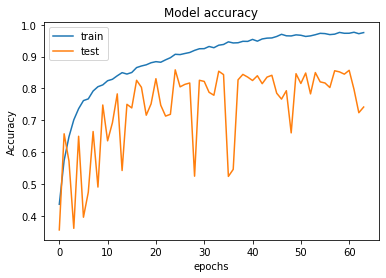

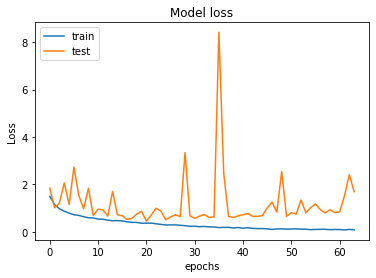

In [56]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel("epochs")
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [61]:
trained = model.fit(images, labels, epochs =1 ,validation_split = 0.1, batch_size=32)

395/395 [==============================] - 7s 19ms/step - loss: 0.0675 - accuracy: 0.9808 - val_loss: 0.9114 - val_accuracy: 0.8547


In [42]:
test_images, test_labels = get_images('/content/sample_data/seg_test/seg_test')

In [43]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_labels = to_categorical(test_labels)

In [44]:
test_images = test_images.astype('float32')
test_images /= 255.0

In [62]:
model.evaluate(test_images, test_labels, verbose = 1)

94/94 [==============================] - 1s 9ms/step - loss: 0.9612 - accuracy: 0.8603


[0.9612041115760803, 0.8603333234786987]

In [65]:
pred_images, pred_labels = get_images('/content/sample_data/seg_pred')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

In [66]:
pred_image = pred_images[1:30]
pred_image = pred_image.astype('float32')
pred_image /= 255.0

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Model Prediction: Glacier


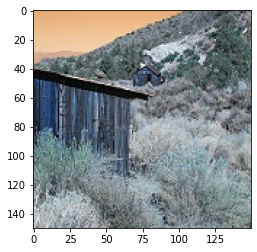

In [67]:
pred_class = model.predict_classes(np.array([pred_images[3]]))
plt.imshow(pred_images[3])
prediction = "none"
if(pred_class == 0):
    prediction = "Building"
elif(pred_class == 1):
    prediction = "Forest"  
elif(pred_class == 2):
    prediction = "Glacier"    
elif(pred_class == 3):
    prediction = "Mountain"
elif(pred_class == 4):
    prediction = 'Sea'
elif(pred_class == 5):
    prediction = "Street"
print("Model Prediction: " + prediction)

Model Prediction: Building


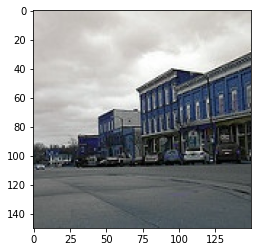

In [70]:
pred_class = model.predict_classes(np.array([pred_images[7]]))
plt.imshow(pred_images[7])
prediction = "none"
if(pred_class == 0):
    prediction = "Building"
elif(pred_class == 1):
    prediction = "Forest"  
elif(pred_class == 2):
    prediction = "Glacier"    
elif(pred_class == 3):
    prediction = "Mountain"
elif(pred_class == 4):
    prediction = 'Sea'
elif(pred_class == 5):
    prediction = "Street"
print("Model Prediction: " + prediction)